<a href="https://colab.research.google.com/github/kfahn22/Colab_notebooks/blob/main/ulam_spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ulam spiral

The ulam spiral code is adapted from [here](https://github.com/scipython/scipython-maths/blob/master/prime_visualizations/ulam_spiral.py)

[Blog by Christian Hill](https://scipython.com/blog/the-ulam-spiral/)

Another implementation by Stanislav Fort can be obtained [here](https://github.com/stanislavfort/ulam-spiral/blob/master/ulam-spiral-generator.py).

I wrote a function to create a random color palette.

In [2]:
import random
import matplotlib.colors as mcolors

# Define new colormap
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LinearSegmentedColormap
colors1 = mcolors.CSS4_COLORS
colors2 = mcolors.XKCD_COLORS

def make_colormap(n_bins, color_choices=None):
    """Return a LinearSegmentedColormap
    color1 and color2 are the two colors that are interpolated between
    n_bins: Discretizes the interpolation into bins
    """
    if color_choices is None:
        colors = colors2
    color_name1 = random.choice(list(colors.keys()))
    color_name2 = random.choice(list(colors.keys()))
    color1 = colors[color_name1]
    color2 = colors[color_name2]
    cmap_name = color_name1 + '/' + color_name2
    color_choices = [color1, color2]
    for n_bin in range(n_bins):
      cmap = LinearSegmentedColormap.from_list(cmap_name, color_choices, N=n_bin)
    return cmap, color_name1, color_name2

Code to create the ulam spiral, adapted to add color.

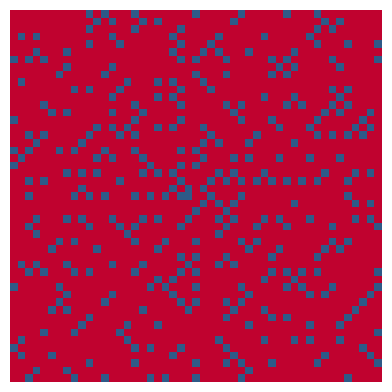

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Visualize prime numbers as an "Ulam spiral"
# The maths behind this code is described in the scipython blog
# article at https://scipython.com/blog/the-ulam-spiral/
# Christian Hill, October 2016.

def make_spiral(arr):
    nrows, ncols= arr.shape
    idx = np.arange(nrows*ncols).reshape(nrows,ncols)[::-1]
    spiral_idx = []
    while idx.size:
        spiral_idx.append(idx[0])
        # Remove the first row (the one we've just appended to spiral).
        idx = idx[1:]
        # Rotate the rest of the array anticlockwise
        idx = idx.T[::-1]
    # Make a flat array of indices spiralling into the array.
    spiral_idx = np.hstack(spiral_idx)
    # Index into a flattened version of our target array with spiral indices.
    spiral = np.empty_like(arr)
    spiral.flat[spiral_idx] = arr.flat[::-1]
    return spiral

# edge size of the square array.
#w = 251
w = 49
# Prime numbers up to and including w**2.
primes = np.array([n for n in range(2,w**2+1) if all(
                        (n % m) != 0 for m in range(2,int(np.sqrt(n))+1))])
# Create an array of boolean values: 1 for prime, 0 for composite
arr = np.zeros(w**2, dtype='u1')
arr[primes-1] = 1
# Spiral the values clockwise out from the centre
arr = make_spiral(arr.reshape((w,w)))

# Generate a random colormap
colormap = make_colormap(4)
# Extract the colormap and the two colors
cmap = colormap[0]
c1 = colormap[1]
c2 = colormap[2]

plt.matshow(arr, cmap=cmap)
plt.axis('off')

plt.savefig('ulam_spiral.png')
plt.show()

Code for the Klauber triangle (also from Christian Hill).

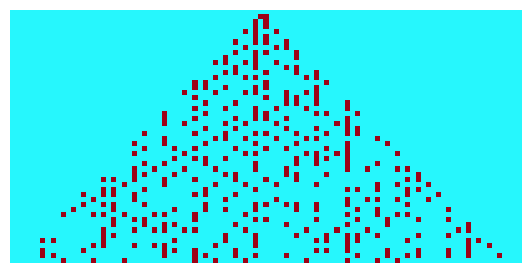

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n = 50
ncols = 2*n+1
nmax = n**2

# Prime numbers up to and including n**2.
primes = np.array([n for n in range(2,n**2+1) if all(
                        (n % m) != 0 for m in range(2,int(np.sqrt(n))+1))])
a = np.zeros(nmax)
a[primes-1]=1

arr = np.zeros((n, ncols))
for i in range(n):
    arr[i,(n-i):(n+i+1)] = a[i**2:i**2+2*i+1]

# Generate a random colormap
colormap = make_colormap(4)
# Extract the colormap and the two colors
cmap = colormap[0]
c1 = colormap[1]
c2 = colormap[2]

# Plot the array
fig, ax = plt.subplots()
ax.matshow(arr, cmap=cmap)
ax.axis('off')
# Ensure the Axes are centred in the figure
ax.set_position([0.1,0.1,0.8,0.8])
plt.show()